## ORI 397: Statistical Methods in Manufacturing
### Homework Assigment # 4
### Name: Sanjit Paliwal
### UT EID: SP42626

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Problem 9.19 Part A)

Here we will first construct the $ X $ and $ R_m $ charts using $ n=3 $

Here we have total number of individual samples = 40
So we calculate $$ \overline{X}= \frac{\sum_{i=1}^{k} X_i}{k} $$
and $$ \overline{R_m}= \frac{\sum_{i=1}^{k-n+1} R_{mi}}{k-n+1} $$

In [2]:
sample = np.array(range(1,41))
n = 3
k = 40
X_i = np.array([-4.53,7.52,-3.05,3.31,13.27,-0.68,8.13,-0.35,5.74,3.92,
               2.43,-0.91,-0.67,5.76,2.44,-0.96,8.72,13.29,2.41,-1.82,
               -4.87,5.12,-2.73,-2.11,-2.29,5.45,0.92,4.26,0.03,5.14,
               -3.91,3.68,11.49,5.45,3.93,10.80,-1.28,10.52,0.91,-1.84])
X_bar = X_i.mean()
j = k - n + 1
sample_j = np.array(range(1,j+1))
R_mi = np.zeros(j)
for i in range(0,j):
        R_mi[i]=np.max(X_i[i:i+3])-np.min(X_i[i:i+3])     
R_m_bar = R_mi.mean() 
print 'Average of X samples is ',X_bar,'and mean of ranges R is',R_m_bar

Average of X samples is  2.816 and mean of ranges R is 8.96263157895


Now we caluclate the Control Limits accroding to the following values 
and formulas :
$ d_2 = 1.693, D_3 = 0, D_4 = 2.575 $
$$ \hat{\sigma_x}= \frac{\overline{R_m}}{d_2} $$
For X Control Charts
$$ UCL = \overline{X} + 3  \hat{\sigma_x} $$
$$ LCL = \overline{X} - 3  \hat{\sigma_x} $$
For $ R_m $ Control Charts
$$ UCL = D_4 \overline{R_m} $$
$$ LCL = D_3 \overline{R_m} $$

In [3]:
d_2 = 1.693
D_4 = 2.575
D_3 = 0
std_x = R_m_bar / d_2
# For X Control Charts 
UCL_X = X_bar + 3*std_x
LCL_X = X_bar - 3*std_x
# For R_m Control Charts
UCL_R = D_4*R_m_bar
LCL_R = D_3*R_m_bar
print 'UCL for X chart is',UCL_X,'and LCL is ',LCL_X
print 'UCL for R_m chart is',UCL_R,'and LCL is',LCL_R

UCL for X chart is 18.6978043336 and LCL is  -13.0658043336
UCL for R_m chart is 23.0787763158 and LCL is 0.0


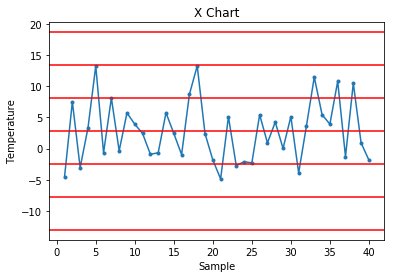

In [4]:
figure(figsize=(6,4))
plt.plot(sample,X_i,'.-')
plt.axhline(y=UCL_X, color='r', linestyle='-')
plt.axhline(y=LCL_X, color='r', linestyle='-')
plt.axhline(y=X_bar, color='r', linestyle='-')
plt.axhline(y=(X_bar + 2*std_x), color='r', linestyle='-')
plt.axhline(y=(X_bar + std_x) , color='r', linestyle='-')
plt.axhline(y=(X_bar - 2*std_x), color='r', linestyle='-')
plt.axhline(y=(X_bar - std_x), color='r', linestyle='-')
ylabel('Temperature')
xlabel('Sample')
title('X Chart')

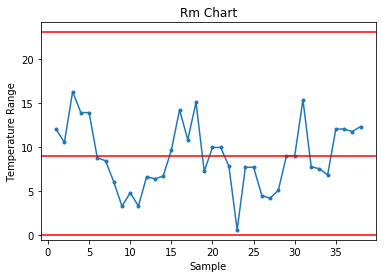

In [5]:
figure(figsize=(6,4))
plot(sample_j,R_mi,'.-')
plt.axhline(y=UCL_R, color='r', linestyle='-')
plt.axhline(y=LCL_R, color='r', linestyle='-')
plt.axhline(y=R_m_bar, color='r', linestyle='-')
ylabel('Temperature Range')
xlabel('Sample')
title('Rm Chart')

After looking at both the X and Rm Control Charts it looks as the process is in statistical control as we see all the data points within the Control limits and there are no trends or oscillatory behavior.

### Problem 9.19 Part B)

Here we will construct the EWMA chart using r=0.5.
Here we have total number of individual samples = 40

So we calculate $$ \overline{X}= \frac{\sum_{i=1}^{k} X_t}{k} $$
and $$ s_x = [\frac{\sum_{t=1}^{k} [{X_{t}-{\overline{X}}}]^2}{k-1}]^{1/2} $$


In [6]:
X_bar = X_i.mean()
s_x = np.std(X_i,ddof=1)
print 'Mean is',X_bar, 'and Sample Standard Deviation is', s_x

Mean is 2.816 and Sample Standard Deviation is 4.96552205017


Now we calculate Exponentially Weighted Moving Averages using the formula :
$$ A_t = r*X_t + (1-r)*A_{t-1} $$
where $$ A_0 = \overline{X} $$

and the Exponentially Weighted Moving Standard Deviations using the formula:
$$ D_t = |X_t - A_{t-1} | $$
$$ V_t = r*D_t + (1-r)*V_{t-1} $$
where $$ V_0 = s_x $$

In [7]:
r=0.5
k=40
A = np.zeros(k+1)
A[0]=X_bar
for i in range(1,k+1):
    A[i]= r*X_i[i-1] + (1-r)*A[i-1]
D = X_i - A[:k]
D = abs(D)
V = np.zeros(k+1)
V[0]=s_x
for i in range(1,k+1):
    V[i]= r*D[i-1] + (1-r)*V[i-1]    

Now we calculate the Control Limits first for EWMA as follows:
$$ UCL_A = \overline{X} + A^* s_x $$
$$ LCL_A = \overline{X} + A^* s_x $$ where we have $ A^* = 1.732 $

And Control Limits for EWM Standard Deviations as follows:
$$ UCL_V = D_2^* s_x $$
$$ UCL_V = D_1^* s_x $$
where centerline is $$ centerline = d_2^* s_x $$
Here $ D_2^* = 2.164,  D_1^*=0,  and,  d_2^*=0.921 $


In [8]:
D_2 = 2.164
D_1 = 0
d_2 = 0.921
A_star = 1.732
UCL_A = X_bar + A_star*s_x
LCL_A = X_bar - A_star*s_x
UCL_V = D_2*s_x
LCL_V = D_1*s_x
centerline_V = d_2*s_x
print 'UCL of EWM Averages is ',UCL_A, ',LCL is ',LCL_A, 'and centerline is',X_bar
print 'UCL of EWM Standard Deviations is ',UCL_V, ', LCL is ',LCL_V,'and centerline is',centerline_V

UCL of EWM Averages is  11.4162841909 ,LCL is  -5.7842841909 and centerline is 2.816
UCL of EWM Standard Deviations is  10.7453897166 , LCL is  0.0 and centerline is 4.57324580821


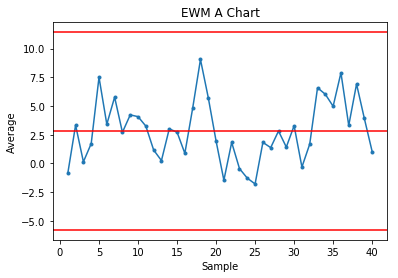

In [10]:
figure(figsize=(6,4))
plt.plot(sample,A[1:],'.-')
plt.axhline(y=UCL_A, color='r', linestyle='-')
plt.axhline(y=LCL_A, color='r', linestyle='-')
plt.axhline(y=X_bar, color='r', linestyle='-')
ylabel('Average')
xlabel('Sample')
title('EWM A Chart')

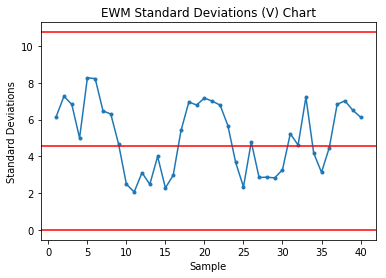

In [11]:
figure(figsize=(6,4))
plt.plot(sample,V[1:],'.-')
plt.axhline(y=UCL_V, color='r', linestyle='-')
plt.axhline(y=LCL_V, color='r', linestyle='-')
plt.axhline(y=centerline_V, color='r', linestyle='-')
ylabel('Standard Deviations')
xlabel('Sample')
title('EWM Standard Deviations (V) Chart')

After looking at both the EWM Averages and EWM Standard Deviation charts it seems that the process is in Statistical Control as all the points lie within the Control limits

### Problem 9.19 Part C)

The two charts in part a) and b) are not that different as both of them show that the process is in Statistical control. The only difference is due to the fact that EWMA charts have weights assigned to past data which is non zero, i.e., EWMA charts take into account past data. So this causes a little difference in the appearance of the charts in part a) and b).

### Problem 9.23 

Here we have r = 0.33. So first we input the 45 sample calculate the sample mean and sample standard deviation using the formula:
$$ \overline{X}= \frac{\sum_{i=1}^{k} X_t}{k} $$
and $$ s_x = [\frac{\sum_{t=1}^{k} [{X_{t}-{\overline{X}}}]^2}{k-1}]^{1/2} $$



In [12]:
X_t = np.array([10,10,13,9,8,9,10,9,10,11,8,10,9,10,9,9,12,11,9,8,13,12,12,12,12,11,12,11,12,11,11,9,9,9,10,10,9,10,
               10,10,8,9,10,9,10])
sample = np.array(range(1,46))
X_bar = X_t.mean()
s_x = np.std(X_t,ddof=1)
print 'Mean is',X_bar, 'and Sample Standard Deviation is', s_x

Mean is 10.1111111111 and Sample Standard Deviation is 1.35214009196


Now we calculate Exponentially Weighted Moving Averages using the formula :
$$ A_t = r*X_t + (1-r)*A_{t-1} $$
where $$ A_0 = \overline{X} $$

and the Exponentially Weighted Moving Standard Deviations using the formula:
$$ D_t = |X_t - A_{t-1} | $$
$$ V_t = r*D_t + (1-r)*V_{t-1} $$
where $$ V_0 = s_x $$

In [13]:
r=0.33
k=45
A = np.zeros(k+1)
A[0]=X_bar
for i in range(1,k+1):
    A[i]= r*X_t[i-1] + (1-r)*A[i-1]
D = X_t - A[:k]
D = abs(D)
V = np.zeros(k+1)
V[0]=s_x
for i in range(1,k+1):
    V[i]= r*D[i-1] + (1-r)*V[i-1] 

Now we calculate the Control Limits first for EWMA as follows:
$$ UCL_A = \overline{X} + A^* s_x $$
$$ LCL_A = \overline{X} + A^* s_x $$ where we have $ A^* = 1.342 $

And Control Limits for EWM Standard Deviations as follows:
$$ UCL_V = D_2^* s_x $$
$$ UCL_V = D_1^* s_x $$
where centerline is $$ centerline = d_2^* s_x $$
Here $ D_2^* = 1.78,  D_1^*=0,  and,  d_2^*=0.874 $

In [14]:
D_2 = 1.78
D_1 = 0
d_2 = 0.874
A_star = 1.342
UCL_A = X_bar + A_star*s_x
LCL_A = X_bar - A_star*s_x
UCL_V = D_2*s_x
LCL_V = D_1*s_x
centerline_V = d_2*s_x
print 'UCL of EWM Averages is ',UCL_A, ',LCL is ',LCL_A,'and centerline is',X_bar
print 'UCL of EWM Standard Deviations is ',UCL_V, ',LCL is ',LCL_V,'and centerline is',centerline_V

UCL of EWM Averages is  11.9256831145 ,LCL is  8.2965391077 and centerline is 10.1111111111
UCL of EWM Standard Deviations is  2.40680936369 ,LCL is  0.0 and centerline is 1.18177044037


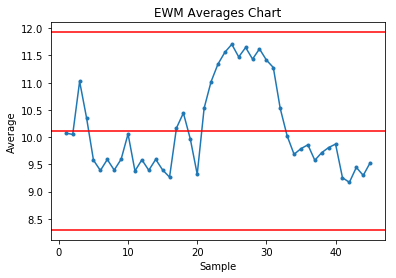

In [15]:
figure(figsize=(6,4))
plt.plot(sample,A[1:],'.-')
plt.axhline(y=UCL_A, color='r', linestyle='-')
plt.axhline(y=LCL_A, color='r', linestyle='-')
plt.axhline(y=X_bar, color='r', linestyle='-')
ylabel('Average')
xlabel('Sample')
title('EWM Averages Chart')

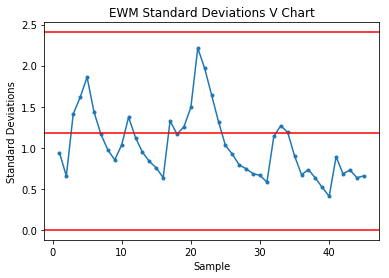

In [16]:
figure(figsize=(6,4))
plt.plot(sample,V[1:],'.-')
plt.axhline(y=UCL_V, color='r', linestyle='-')
plt.axhline(y=LCL_V, color='r', linestyle='-')
plt.axhline(y=centerline_V, color='r', linestyle='-')
ylabel('Standard Deviations')
xlabel('Sample')
title('EWM Standard Deviations V Chart')

In the above EWM A and V charts we see that all the data points lie within the Control limits so we can say that the the mold-changing process is in statistical control. But there are some trends which indicate the possibility of a sudden process shift that could not be detected by EWMA charts to be statistically significant.

### Problem 9.24

Here we plot the Rm and X charts for n=3. Here we have total number of individual samples = 45
So we calculate $$ \overline{X}= \frac{\sum_{i=1}^{k} X_i}{k} $$
and $$ \overline{R_m}= \frac{\sum_{i=1}^{k-n+1} R_{mi}}{k-n+1} $$

In [17]:
sample = np.array(range(1,46))
n = 3
k = 45
X_i = np.array([10,10,13,9,8,9,10,9,10,11,8,10,9,10,9,9,12,11,9,8,13,12,12,12,12,11,12,11,12,11,11,9,9,9,10,10,9,10,
               10,10,8,9,10,9,10])
X_bar = X_i.mean()
j = k - n + 1
sample_j = np.array(range(1,j+1))
R_mi = np.zeros(j)
for i in range(0,j):
        R_mi[i]=np.max(X_i[i:i+3])-np.min(X_i[i:i+3])     
R_m_bar = R_mi.mean() 
print 'Average of X samples is ',X_bar,'and mean of ranges R is',R_m_bar

Average of X samples is  10.1111111111 and mean of ranges R is 1.76744186047


Now we caluclate the Control Limits accroding to the following values 
and formulas :
$ d_2 = 1.693, D_3 = 0, D_4 = 2.575 $
$$ \hat{\sigma_x}= \frac{\overline{R_m}}{d_2} $$
For X Control Charts
$$ UCL = \overline{X} + 3  \hat{\sigma_x} $$
$$ LCL = \overline{X} - 3  \hat{\sigma_x} $$
For $ R_m $ Control Charts
$$ UCL = D_4 \overline{R_m} $$
$$ LCL = D_3 \overline{R_m} $$

In [18]:
d_2 = 1.693
D_4 = 2.575
D_3 = 0
std_x = R_m_bar / d_2
# For X Control Charts 
UCL_X = X_bar + 3*std_x
LCL_X = X_bar - 3*std_x
# For R_m Control Charts
UCL_R = D_4*R_m_bar
LCL_R = D_3*R_m_bar
print 'UCL for X chart is',UCL_X,',LCL is',LCL_X,'and centerline is',X_bar
print 'UCL for R_m chart is',UCL_R,',LCL is',LCL_R,'and centerline is',R_m_bar

UCL for X chart is 13.2430222637 ,LCL is 6.97919995849 and centerline is 10.1111111111
UCL for R_m chart is 4.5511627907 ,LCL is 0.0 and centerline is 1.76744186047


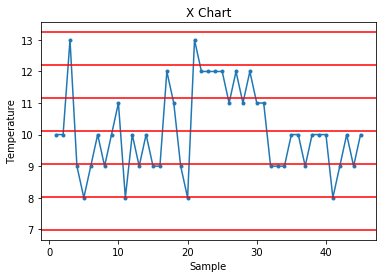

In [19]:
figure(figsize=(6,4))
plt.plot(sample,X_i,'.-')
plt.axhline(y=UCL_X, color='r', linestyle='-')
plt.axhline(y=LCL_X, color='r', linestyle='-')
plt.axhline(y=X_bar, color='r', linestyle='-')
plt.axhline(y=(X_bar + 2*std_x), color='r', linestyle='-')
plt.axhline(y=(X_bar + std_x) , color='r', linestyle='-')
plt.axhline(y=(X_bar - 2*std_x), color='r', linestyle='-')
plt.axhline(y=(X_bar - std_x), color='r', linestyle='-')
ylabel('Temperature')
xlabel('Sample')
title('X Chart')

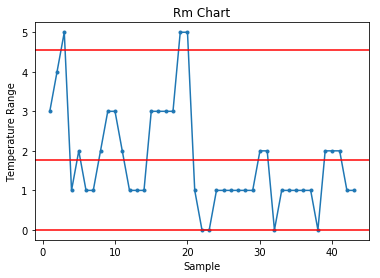

In [20]:
figure(figsize=(6,4))
plot(sample_j,R_mi,'.-')
plt.axhline(y=UCL_R, color='r', linestyle='-')
plt.axhline(y=LCL_R, color='r', linestyle='-')
plt.axhline(y=R_m_bar, color='r', linestyle='-')
ylabel('Temperature Range')
xlabel('Sample')
title('Rm Chart')

Rm Control chart shows that some of the data points lie outside the Control Limit which means that the process is not in Statistical control. This out of control characteristic was not detected by the EWMA chart as the EWMA chart takes into account past data. It assigns weights to the past data which smoothens the curve and makes it difficult to identify sudden changes in process mean and variability. Therefore the EWMA charts are unable to detect the out of control nature but the X and Rm chart does.

### Problem 13.6
(a)	Number of defects = 19 <br>
(b)	Number of defectives = 10 <br>
(c)	Fraction defectives = 5/8 <br>
(d)	Average defects per unit = 19/16

### Problem 13.11 Part a)

Here we have 25 samples each of size n= 100 <br>
$$ \overline{p} = \sum_{i=1}^{k} {\frac{p_i}{k}} $$
where each $ p_i $ is calculated from the sample as $$ p_i = \frac{\sum_{i=1}^{n} d_i}{n} $$
and we then calculate the Control Chart limits as
$$ UCL = \overline{p} + 3 \sqrt{\frac{\overline{p}(1-\overline{p})}{n}} $$
$$ LCL = \overline{p} - 3 \sqrt{\frac{\overline{p}(1-\overline{p})}{n}} $$

In [21]:
n=100.0
D_i = np.array([1,6,3,1,3,2,0,2,4,1,5,4,5,4,3,3,2,4,4,4,2,5,2,6,3])
sample = np.array(range(1,26))
D_i = D_i.astype(float)
p_i = D_i/100.0
p_bar = p_i.mean()
var_p = (p_bar*(1-p_bar))/n
std_p = sqrt(var_p)
UCL_p = p_bar + 3*std_p
LCL_p = p_bar - 3*std_p
if LCL_p <0:
    LCL_p = 0
print 'p_bar value is',p_bar,'and Standard Deviation is',std_p
print 'UCL of p chart is',UCL_p,',LCL is',LCL_p,'and centerline is',p_bar

p_bar value is 0.0316 and Standard Deviation is 0.0174932672763
UCL of p chart is 0.0840798018289 ,LCL is 0 and centerline is 0.0316


Note above the LCL is made zero as it comes out negative.
### Problem 13.11 Part b)

Now plotting the p chart for the first 25 samples each of size 100

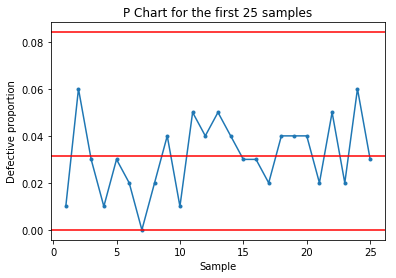

In [22]:
figure(figsize=(6,4))
plot(sample,p_i,'.-')
plt.axhline(y=UCL_p, color='r', linestyle='-')
plt.axhline(y=LCL_p, color='r', linestyle='-')
plt.axhline(y=p_bar, color='r', linestyle='-')
ylabel('Defective proportion')
xlabel('Sample')
title('P Chart for the first 25 samples')

By looking at the above P chart for the first 25 samples we can say that the process is in statistical control as there are no extreme points and no linear trends and oscillatory behavior.

### Problem 13.11 Part c)

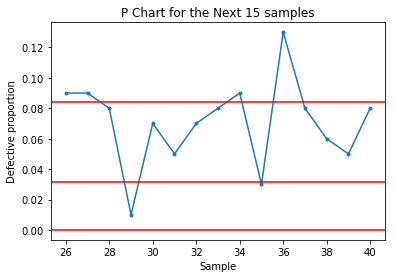

In [23]:
sample_next = np.array(range(26,41))
n=100.0
D_i_next = np.array([9,9,8,1,7,5,7,8,9,3,13,8,6,5,8])
D_i_next = D_i_next.astype(float)
p_i_next = D_i_next/100.0
figure(figsize=(6,4))
plot(sample_next,p_i_next,'.-')
plt.axhline(y=UCL_p, color='r', linestyle='-')
plt.axhline(y=LCL_p, color='r', linestyle='-')
plt.axhline(y=p_bar, color='r', linestyle='-')
ylabel('Defective proportion')
xlabel('Sample')
title('P Chart for the Next 15 samples')

From the above P chart of the next 15 samples each of size 100 we can say that the process is not in Statistical Control as some of the data points lie outside the Control limits.

### Problem 13.26 a)

C chart 

In [24]:
df = pd.read_csv('Water Bottle .csv')
df.head()

,sample,missing cap,scratches,flow lines,excess flash
0,1,6,6,4,7
1,2,3,4,1,8
2,3,8,5,0,8
3,4,3,3,1,5
4,5,9,3,3,6


In [25]:
df['Total Defects']= df['missing cap']+df['scratches']+df['flow lines']+ df['excess flash']
df.head()

,sample,missing cap,scratches,flow lines,excess flash,Total Defects
0,1,6,6,4,7,23
1,2,3,4,1,8,16
2,3,8,5,0,8,21
3,4,3,3,1,5,12
4,5,9,3,3,6,21


Now for the C chart we calculate the following
$$ \overline{c} = \sum_{i=1}^{k} {\frac{c_i}{k}} $$ where k = 25 and $c_i$ is the number of defects in the i-th sample. Now Control limits for C chart are calculated using
$$ UCL_c = \overline{c} + 3\sqrt{\overline{c}} $$
$$ LCL_c = \overline{c} - 3\sqrt{\overline{c}} $$

In [26]:
c_bar = df['Total Defects'].mean()
UCL_c = c_bar + 3*sqrt(c_bar)
LCL_c = c_bar - 3*sqrt(c_bar)
print 'Centerline of the C_chart is',c_bar
print 'UCL of C chart is',UCL_c,'and LCL is',LCL_c

Centerline of the C_chart is 17.36
UCL of C chart is 29.8595999936 and LCL is 4.8604000064


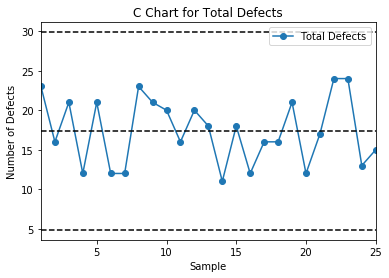

In [27]:
df.plot(x='sample', y='Total Defects', style='-o',figsize=(6,4))
plt.plot([1, 25], [UCL_c, UCL_c], 'k--')
plt.plot([1, 25], [LCL_c, LCL_c], 'k--')
plt.plot([1, 25], [c_bar , c_bar], 'k--')
plt.ylabel("Number of Defects")
plt.xlabel("Sample")
plt.title("C Chart for Total Defects")

### Problem 13.26 b)

From the C chart of the Total Defects we can say that the process is in Statistical Control as all the data points lie within the Control Limits and there is no trend or oscillatory behavior.

### Problem 13.26 c) 
Now we construct the individual C charts for defects

In [30]:
c_missingbar = df['missing cap'].mean()
UCL_cmissing = c_missingbar + 3*sqrt(c_missingbar)
LCL_cmissing = c_missingbar - 3*sqrt(c_missingbar)
if (LCL_cmissing<0):
    LCL_cmissing = 0.0
print 'Centerline of the  Missing Cap C_chart is',c_missingbar
print 'UCL of Missing cap C chart is',UCL_cmissing,'and LCL is',LCL_cmissing
c_scratchesbar = df['scratches'].mean()
UCL_cscratches = c_scratchesbar + 3*sqrt(c_scratchesbar)
LCL_cscratches = c_scratchesbar - 3*sqrt(c_scratchesbar)
if (LCL_cscratches<0):
    LCL_cscratches = 0.0
print 'Centerline of the Scratches C_chart is',c_scratchesbar
print 'UCL of Scratches C chart is',UCL_cscratches,'and LCL is',LCL_cscratches
c_flowbar = df['flow lines'].mean()
UCL_cflow = c_flowbar + 3*sqrt(c_flowbar)
LCL_cflow = c_flowbar - 3*sqrt(c_flowbar)
if (LCL_cflow<0):
    LCL_cflow = 0.0
print 'Centerline of the Flow lines C_chart is',c_flowbar
print 'UCL of Flow lines C chart is',UCL_cflow,'and LCL is',LCL_cflow
c_excessbar = df['excess flash'].mean()
UCL_cexcess = c_excessbar + 3*sqrt(c_excessbar)
LCL_cexcess = c_excessbar - 3*sqrt(c_excessbar)
if (LCL_cexcess<0):
    LCL_cexcess = 0.0
print 'Centerline of the Excess flash C_chart is',c_excessbar
print 'UCL of Excess flash C chart is',UCL_cexcess,'and LCL is',LCL_cexcess
print 'Note all the LCL have been made to zero when negative'

Centerline of the  Missing Cap C_chart is 4.36
UCL of Missing cap C chart is 10.6241839053 and LCL is 0.0
Centerline of the Scratches C_chart is 2.56
UCL of Scratches C chart is 7.36 and LCL is 0.0
Centerline of the Flow lines C_chart is 3.2
UCL of Flow lines C chart is 8.566563146 and LCL is 0.0
Centerline of the Excess flash C_chart is 7.24
UCL of Excess flash C chart is 15.3121744282 and LCL is 0.0
Note all the LCL have been made to zero when negative


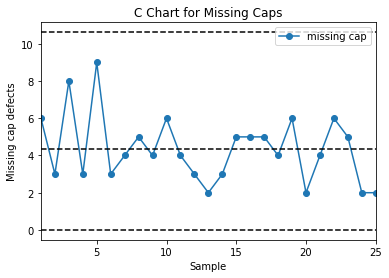

In [31]:
df.plot(x='sample', y='missing cap', style='-o',figsize=(6,4))
plt.plot([1, 25], [UCL_cmissing, UCL_cmissing], 'k--')
plt.plot([1, 25], [LCL_cmissing, LCL_cmissing], 'k--')
plt.plot([1, 25], [c_missingbar , c_missingbar], 'k--')
plt.ylabel("Missing cap defects")
plt.xlabel("Sample")
plt.title("C Chart for Missing Caps")

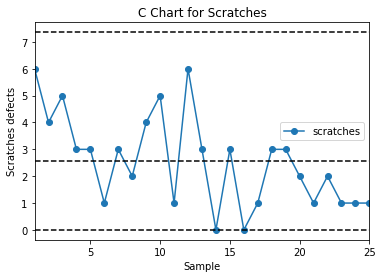

In [32]:
df.plot(x='sample', y='scratches', style='-o',figsize=(6,4))
plt.plot([1, 25], [UCL_cscratches, UCL_cscratches], 'k--')
plt.plot([1, 25], [LCL_cscratches, LCL_cscratches], 'k--')
plt.plot([1, 25], [c_scratchesbar , c_scratchesbar], 'k--')
plt.ylabel("Scratches defects")
plt.xlabel("Sample")
plt.title("C Chart for Scratches")

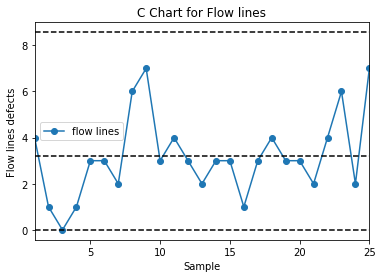

In [33]:
df.plot(x='sample', y='flow lines', style='-o',figsize=(6,4))
plt.plot([1, 25], [UCL_cflow, UCL_cflow], 'k--')
plt.plot([1, 25], [LCL_cflow, LCL_cflow], 'k--')
plt.plot([1, 25], [c_flowbar , c_flowbar], 'k--')
plt.ylabel("Flow lines defects")
plt.xlabel("Sample")
plt.title("C Chart for Flow lines")

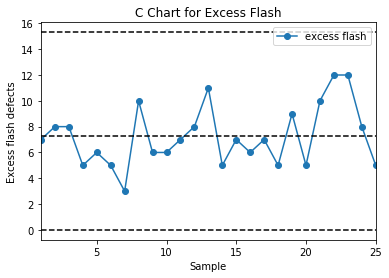

In [34]:
df.plot(x='sample', y='excess flash', style='-o',figsize=(6,4))
plt.plot([1, 25], [UCL_cexcess, UCL_cexcess], 'k--')
plt.plot([1, 25], [LCL_cexcess, LCL_cexcess], 'k--')
plt.plot([1, 25], [c_excessbar , c_excessbar], 'k--')
plt.ylabel("Excess flash defects")
plt.xlabel("Sample")
plt.title("C Chart for Excess Flash")

From all the C charts for Missing Cap, Scratches , Flow Lines and Excess Flash we see that the process seems to be in Statistical control as all the data points lie within the control limits. All the inidividual C charts show process to be in statistical control. We can also observe that the Control limits are widest for Excess Flash and narrowest for Scratches.

### Problem 13.26 d)

Total defects due to Missing Caps is 109 ,Scratches is 64 ,Flow lines is 80
and Excess Flash is 181


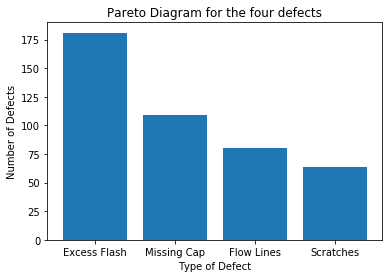

In [35]:
missing = df['missing cap'].sum()
scratches = df['scratches'].sum()
flows = df['flow lines'].sum()
excess = df['excess flash'].sum()
defects = np.array([excess,missing, flows, scratches])
index = [1,2,3,4]
print 'Total defects due to Missing Caps is',missing,',Scratches is',scratches,',Flow lines is',flows
print 'and Excess Flash is',excess
index_def = ['Excess Flash','Missing Cap','Flow Lines','Scratches']
bar(index,defects, align='center')
gca().xaxis.set_ticks(index)
gca().xaxis.set_ticklabels(index_def)
plt.ylabel('Number of Defects')
plt.xlabel('Type of Defect')
plt.title('Pareto Diagram for the four defects')

As the process is in Statistical Control as per the Total Defects C Chart as well as the individual C Charts of the Four defects we conclude that the problem solving efforts should be concentrated on reducing the number of defects due to Excess Flash as they are total 181 in number. Also the Control limits for the Excess Flash are the widest.

### Problem 13.30 a)

Here for the C chart we calculate the following
$$ \overline{c} = \sum_{i=1}^{k} {\frac{c_i}{k}} $$ where k = 50 and $c_i$ is the number of defects in the i-th sample. Now Control limits for C chart are calculated using
$$ UCL_c = \overline{c} + 3\sqrt{\overline{c}} $$
$$ LCL_c = \overline{c} - 3\sqrt{\overline{c}} $$

In [36]:
C_i = np.array([2,5,3,3,5,4,6,0,5,5,4,4,3,6,4,0,6,3,6,11,6,5,6,7,7,9,2,1,3,1,4,4,5,
               4,4,2,5,4,6,5,3,1,2,2,2,3,6,7,3,6])
sample = np.array(arange(1,51))
c_bar = C_i.mean()
UCL_c = c_bar + 3*sqrt(c_bar)
LCL_c = c_bar - 3*sqrt(c_bar)
if LCL_c<0:
    LCL_c=0
print 'Centerline of the C chart is',c_bar
print 'UCL of C chart is',UCL_c,'and LCL is',LCL_c
print 'Note that the LCL has been made zero'

Centerline of the C chart is 4.2
UCL of C chart is 10.3481704596 and LCL is 0
Note that the LCL has been made zero


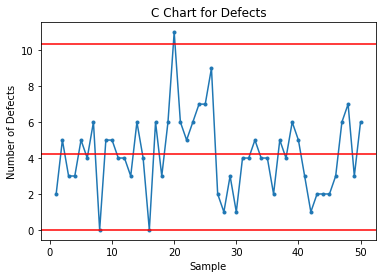

In [37]:
figure(figsize=(6,4))
plot(sample,C_i,'.-')
plt.axhline(y=UCL_c, color='r', linestyle='-')
plt.axhline(y=LCL_c, color='r', linestyle='-')
plt.axhline(y=c_bar, color='r', linestyle='-')
ylabel('Number of Defects')
xlabel('Sample')
title('C Chart for Defects')

As we see from the C Chart that the Sample number 20 falls outside the Control Limit which means that the process is not in Statistical Control.

### Problem 13.31  a)

We have to choose 5 non-defective and 3 defective gears. We can select 5 non-defective gears in $\binom{4700}{5}$ and the 3 defective in $\binom{300}{3}$ ways. So for the selection of total 8 gears can be done in $\binom{4700}{5}*\binom{300}{3}$ ways. The number of ways is equal to $ 8.496*10^{22} $.

### Problem 13.31 b)
$P(defective) = p = 300/5000 $ <br>
$P(non defective) = 1 - p = 4700/5000 $ <br>
Now the selection of 3 defectives out of 8 total gears is a Binomial distribution with each Bernoulli trial being independent of each other. Here we denote X as the number of defective gears.
$ P (X = 3 ) = \binom{8}{3} [{\frac{300}{5000}}]^3 [{\frac{4700}{5000}}]^5 = 0.00887 $

### Problem 13.31 c)
Now for this part we have to calculate $ P (X >1)$. <br>

Now we can say that  <br>
Probability of defective greater than 1 = 1 - ( Probaility of no defective + Probability of 1 defective) <br>
$$ P (X>1) = 1 - (P(X=1) + P(X=0)) $$

$$ P (X>1) = 1 - (\binom{8}{0} [{\frac{300}{5000}}]^0 [{\frac{4700}{5000}}]^8 + \binom{8}{1} [{\frac{300}{5000}}]^1 [{\frac{4700}{5000}}]^7 ) $$
$$ P (X>1) = 1 - (0.609568938 + 0.311269245) $$
$$ P (X>1) = 0.07916 $$

So Probability of getting more than 1 defective is 0.07916.

### Problem 9

Here we have $ \mu_0 = 20 $, $ \mu_1 = 21 $, $ \mu_2 = 19 $ <br>
So $$ \Delta_1 = \mu_1 - \mu_0 = 1 $$ $$ \Delta_2 = \mu_2 - \mu_0 = -1 $$
$$ \beta_1 = \beta_2 = \alpha = 0.05 $$


In [38]:
df_CUSUM = pd.read_csv('Homework4CUSUMProblem.csv')
df_CUSUM.head()

,sample,X
0,1,17.821871
1,2,20.065115
2,3,21.105054
3,4,22.201220
4,5,23.088424


In [39]:
df_CUSUM_head = df_CUSUM.head(30)
mu_zero = 20
mu_one = 21
mu_two = 19
delta_one = float(mu_one - mu_zero)
delta_two = float(mu_two - mu_zero)
beta_one = 0.05
beta_two = 0.05
alpha = 0.05
ucl_const = log((1-beta_one)/(alpha))
lcl_const = log((1-beta_two)/(alpha))
std_dev_x = df_CUSUM_head.X.std()
df_CUSUM_head['X_diff']= df_CUSUM_head['X']-mu_zero
S_t = np.zeros(30)
S_t[0]=df_CUSUM_head['X_diff'][0]
for i in range (1,30):
    S_t[i] = S_t[i-1] + df_CUSUM_head['X_diff'][i]
df_CUSUM_head['S_t'] = S_t
df_CUSUM_head['UCL']= ((std_dev_x*std_dev_x)/(delta_one))*(ucl_const) + df_CUSUM_head['sample']*(delta_one/2.0)
df_CUSUM_head['LCL']= ((std_dev_x*std_dev_x)/(delta_two))*(lcl_const) + df_CUSUM_head['sample']*(delta_two/2.0)
df_CUSUM_head

,sample,X,X_diff,S_t,UCL,LCL
0,1,17.821871,-2.178129,-2.178129,12.291161,-12.291161
1,2,20.065115,0.065115,-2.113014,12.791161,-12.791161
2,3,21.105054,1.105054,-1.007960,13.291161,-13.291161
3,4,22.201220,2.201220,1.193261,13.791161,-13.791161
4,5,23.088424,3.088424,4.281685,14.291161,-14.291161
5,6,20.171862,0.171862,4.453547,14.791161,-14.791161
6,7,17.016819,-2.983181,1.470366,15.291161,-15.291161
7,8,18.515396,-1.484604,-0.014237,15.791161,-15.791161
8,9,17.876837,-2.123163,-2.137401,16.291161,-16.291161
9,10,24.700914,4.700914,2.563514,16.791161,-16.791161


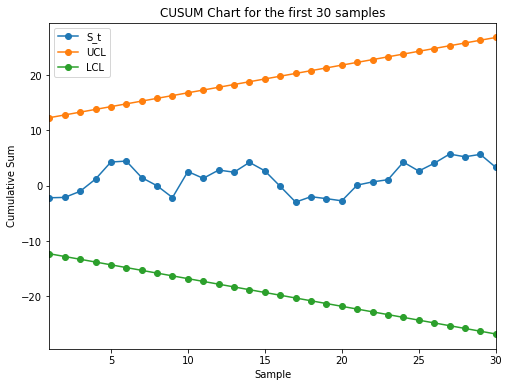

In [40]:
df_CUSUM_head.plot(x='sample', y=['S_t','UCL','LCL'], style='-o',figsize=(8,6))
plt.ylabel("Cumulative Sum")
plt.xlabel("Sample")
plt.title("CUSUM Chart for the first 30 samples")

The above CUSUM chart for the first 30 data points shows that there is no shift in either direction and the the process is randomly varying about zero.

In [41]:
UCL = df_CUSUM_head['UCL'][29]
LCL = df_CUSUM_head['LCL'][29]
df_CUSUM_tail = df_CUSUM.tail(30)
df_CUSUM_tail['X_diff']= df_CUSUM_tail['X']-mu_zero
S_t = np.zeros(30)
S_t[0]= df_CUSUM_head['S_t'][29] + df_CUSUM_tail['X_diff'][30]
for i in range (1,30):
    S_t[i] = S_t[i-1] + df_CUSUM_tail['X_diff'][30+i]
df_CUSUM_tail['S_t'] = S_t
df_CUSUM_tail['UCL']=UCL
df_CUSUM_tail['LCL']=LCL
df_CUSUM_tail

,sample,X,X_diff,S_t,UCL,LCL
30,31,17.704094,-2.295906,1.035009,26.791161,-26.791161
31,32,20.209749,0.209749,1.244758,26.791161,-26.791161
32,33,21.444508,1.444508,2.689266,26.791161,-26.791161
33,34,25.170983,5.170983,7.860249,26.791161,-26.791161
34,35,18.666219,-1.333781,6.526467,26.791161,-26.791161
35,36,20.374662,0.374662,6.901129,26.791161,-26.791161
36,37,19.835011,-0.164989,6.736140,26.791161,-26.791161
37,38,16.133954,-3.866046,2.870095,26.791161,-26.791161
38,39,19.122068,-0.877932,1.992162,26.791161,-26.791161
39,40,16.410642,-3.589358,-1.597195,26.791161,-26.791161


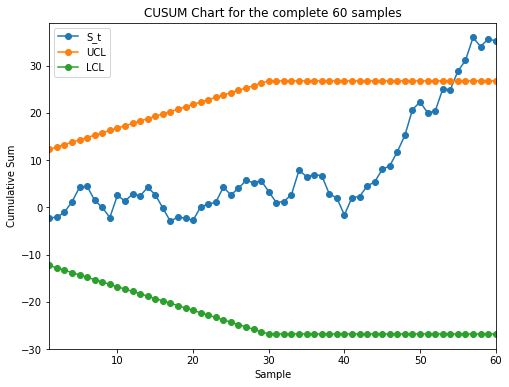

In [42]:
df_CUSUM_final = pd.concat([df_CUSUM_head,df_CUSUM_tail])
df_CUSUM_final.plot(x='sample', y=['S_t','UCL','LCL'], style='-o',figsize=(8,6))
plt.ylabel("Cumulative Sum")
plt.xlabel("Sample")
plt.title("CUSUM Chart for the complete 60 samples")

The CUSUM chart for the entire 60 data points shows that some points lie outside the Control Limits. The Control limits for the next 30 points is the same as calculated for the 30th data point. We see that the process is undergoing an upward shift.